<a href="https://colab.research.google.com/github/harbidel/Data-Minign-on-Dow-Jones-Industrial-Index-Dataset/blob/main/Data_Mining_and_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('/content/dow_jones_index.data')
data.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    float64
 9   percent_change_volume_over_last_wk  720 non-null    float64
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [ ]:
# Remove the dollar sign from relevant columns
columns_to_remove_dollar_sign = ['open',	'high', 'low', 'close', 'volume', 'percent_change_price', 'percent_change_volume_over_last_wk',
                                 'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close', 'percent_change_next_weeks_price',
                                 'days_to_next_dividend', 'percent_return_next_dividend']

for col in columns_to_remove_dollar_sign:
    data[col] = data[col].astype(str).str.replace('$', '')

# Convert columns to the appropriate data types if necessary
data['volume'] = data['volume'].astype(int)
data['previous_weeks_volume'] = data['previous_weeks_volume'].astype(float)
data['next_weeks_open'] = data['next_weeks_open'].astype(float)
data['next_weeks_close'] = data['next_weeks_close'].astype(float)

# Print the updated dataset
data.head()


<ipython-input-4-a4dd8c01c857>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[col] = data[col].astype(str).str.replace('$', '')


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,nan,NaN,16.71,15.97,-4.42849,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223028,239655616.0,16.19,15.79,-2.47066,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.02495926,242963398.0,15.87,16.13,1.63831,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500109,138428495.0,16.18,17.14,5.93325,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987451735,151379173.0,17.33,17.37,0.230814,97,0.175029


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   stock                               750 non-null    object 
 2   date                                750 non-null    object 
 3   open                                750 non-null    object 
 4   high                                750 non-null    object 
 5   low                                 750 non-null    object 
 6   close                               750 non-null    object 
 7   volume                              750 non-null    int64  
 8   percent_change_price                750 non-null    object 
 9   percent_change_volume_over_last_wk  750 non-null    object 
 10  previous_weeks_volume               720 non-null    float64
 11  next_weeks_open                     750 non-n

In [ ]:
# Drop the "Stock" and "Date" columns
data = data.drop(['stock', 'date'], axis=1)

# Print the updated dataset
data.head()


,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,15.82,16.72,15.78,16.42,239655616,3.79267,nan,NaN,16.71,15.97,-4.42849,26,0.182704
1,1,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223028,239655616.0,16.19,15.79,-2.47066,19,0.187852
2,1,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.02495926,242963398.0,15.87,16.13,1.63831,12,0.189994
3,1,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500109,138428495.0,16.18,17.14,5.93325,5,0.185989
4,1,16.18,17.39,16.18,17.14,154387761,5.93325,1.987451735,151379173.0,17.33,17.37,0.230814,97,0.175029


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   open                                750 non-null    object 
 2   high                                750 non-null    object 
 3   low                                 750 non-null    object 
 4   close                               750 non-null    object 
 5   volume                              750 non-null    int64  
 6   percent_change_price                750 non-null    object 
 7   percent_change_volume_over_last_wk  750 non-null    object 
 8   previous_weeks_volume               720 non-null    float64
 9   next_weeks_open                     750 non-null    float64
 10  next_weeks_close                    750 non-null    float64
 11  percent_change_next_weeks_price     750 non-n

In [ ]:
# Convert object columns to numerical data type
data['open'] = pd.to_numeric(data['open'], errors='coerce')
data['high'] = pd.to_numeric(data['high'], errors='coerce')
data['low'] = pd.to_numeric(data['low'], errors='coerce')
data['close'] = pd.to_numeric(data['close'], errors='coerce')
data['volume'] = pd.to_numeric(data['volume'], errors='coerce')
data['percent_change_price'] = pd.to_numeric(data['percent_change_price'], errors='coerce')
data['percent_change_volume_over_last_wk'] = pd.to_numeric(data['percent_change_volume_over_last_wk'], errors='coerce')
data['previous_weeks_volume'] = pd.to_numeric(data['previous_weeks_volume'], errors='coerce')
data['next_weeks_open'] = pd.to_numeric(data['next_weeks_open'], errors='coerce')
data['next_weeks_close'] = pd.to_numeric(data['next_weeks_close'], errors='coerce')
data['percent_change_next_weeks_price'] = pd.to_numeric(data['percent_change_next_weeks_price'], errors='coerce')
data['days_to_next_dividend'] = pd.to_numeric(data['days_to_next_dividend'], errors='coerce')
data['percent_return_next_dividend'] = pd.to_numeric(data['percent_return_next_dividend'], errors='coerce')

# Print the updated dataset
data.head()


,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,15.82,16.72,15.78,16.42,239655616,3.79267,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   quarter                             750 non-null    int64  
 1   open                                750 non-null    float64
 2   high                                750 non-null    float64
 3   low                                 750 non-null    float64
 4   close                               750 non-null    float64
 5   volume                              750 non-null    int64  
 6   percent_change_price                750 non-null    float64
 7   percent_change_volume_over_last_wk  720 non-null    float64
 8   previous_weeks_volume               720 non-null    float64
 9   next_weeks_open                     750 non-null    float64
 10  next_weeks_close                    750 non-null    float64
 11  percent_change_next_weeks_price     750 non-n

In [ ]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)


In [ ]:
# Scale the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


## Apply K-means clustering:

In [ ]:
# Instantiate K-means with the desired number of clusters
kmeans = KMeans(n_clusters=5)

# Fit the data to the K-means model
kmeans.fit(scaled_data)

# Get the cluster labels
kmeans_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Compute the silhouette score for K-means
kmeans_silhouette = silhouette_score(scaled_data, kmeans_labels)
print("K-means Silhouette Score:", kmeans_silhouette)

K-means Silhouette Score: 0.21432077300547614


## Apply DBSCAN:

In [ ]:
# Instantiate DBSCAN with adjusted parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the data to the DBSCAN model
dbscan.fit(scaled_data)

# Get the cluster labels (-1 represents noise/outliers)
dbscan_labels = dbscan.labels_


In [ ]:
# Compute the number of clusters (excluding noise/outliers)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print("Number of clusters:", n_clusters)

# Compute the silhouette score for DBSCAN if there are at least two unique labels
if n_clusters > 1:
    dbscan_silhouette = silhouette_score(scaled_data, dbscan_labels)
    print("DBSCAN Silhouette Score:", dbscan_silhouette)
else:
    print("Insufficient clusters to compute silhouette score.")

Number of clusters: 0
Insufficient clusters to compute silhouette score.


## Visualize the results:

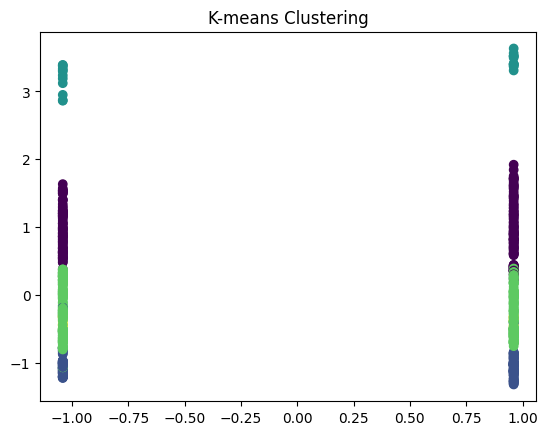

In [ ]:
# Plot the K-means clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels)
plt.title("K-means Clustering")
plt.show()


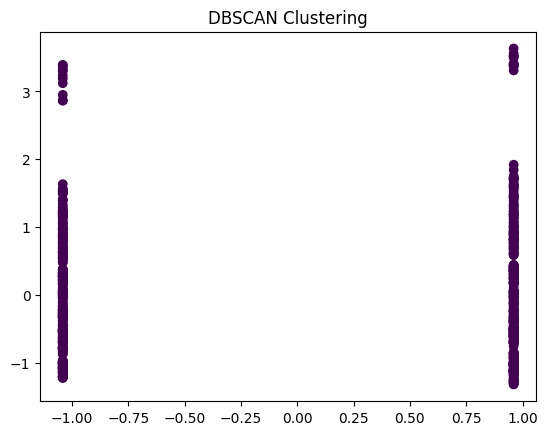

In [ ]:
# Plot the DBSCAN clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")
plt.show()


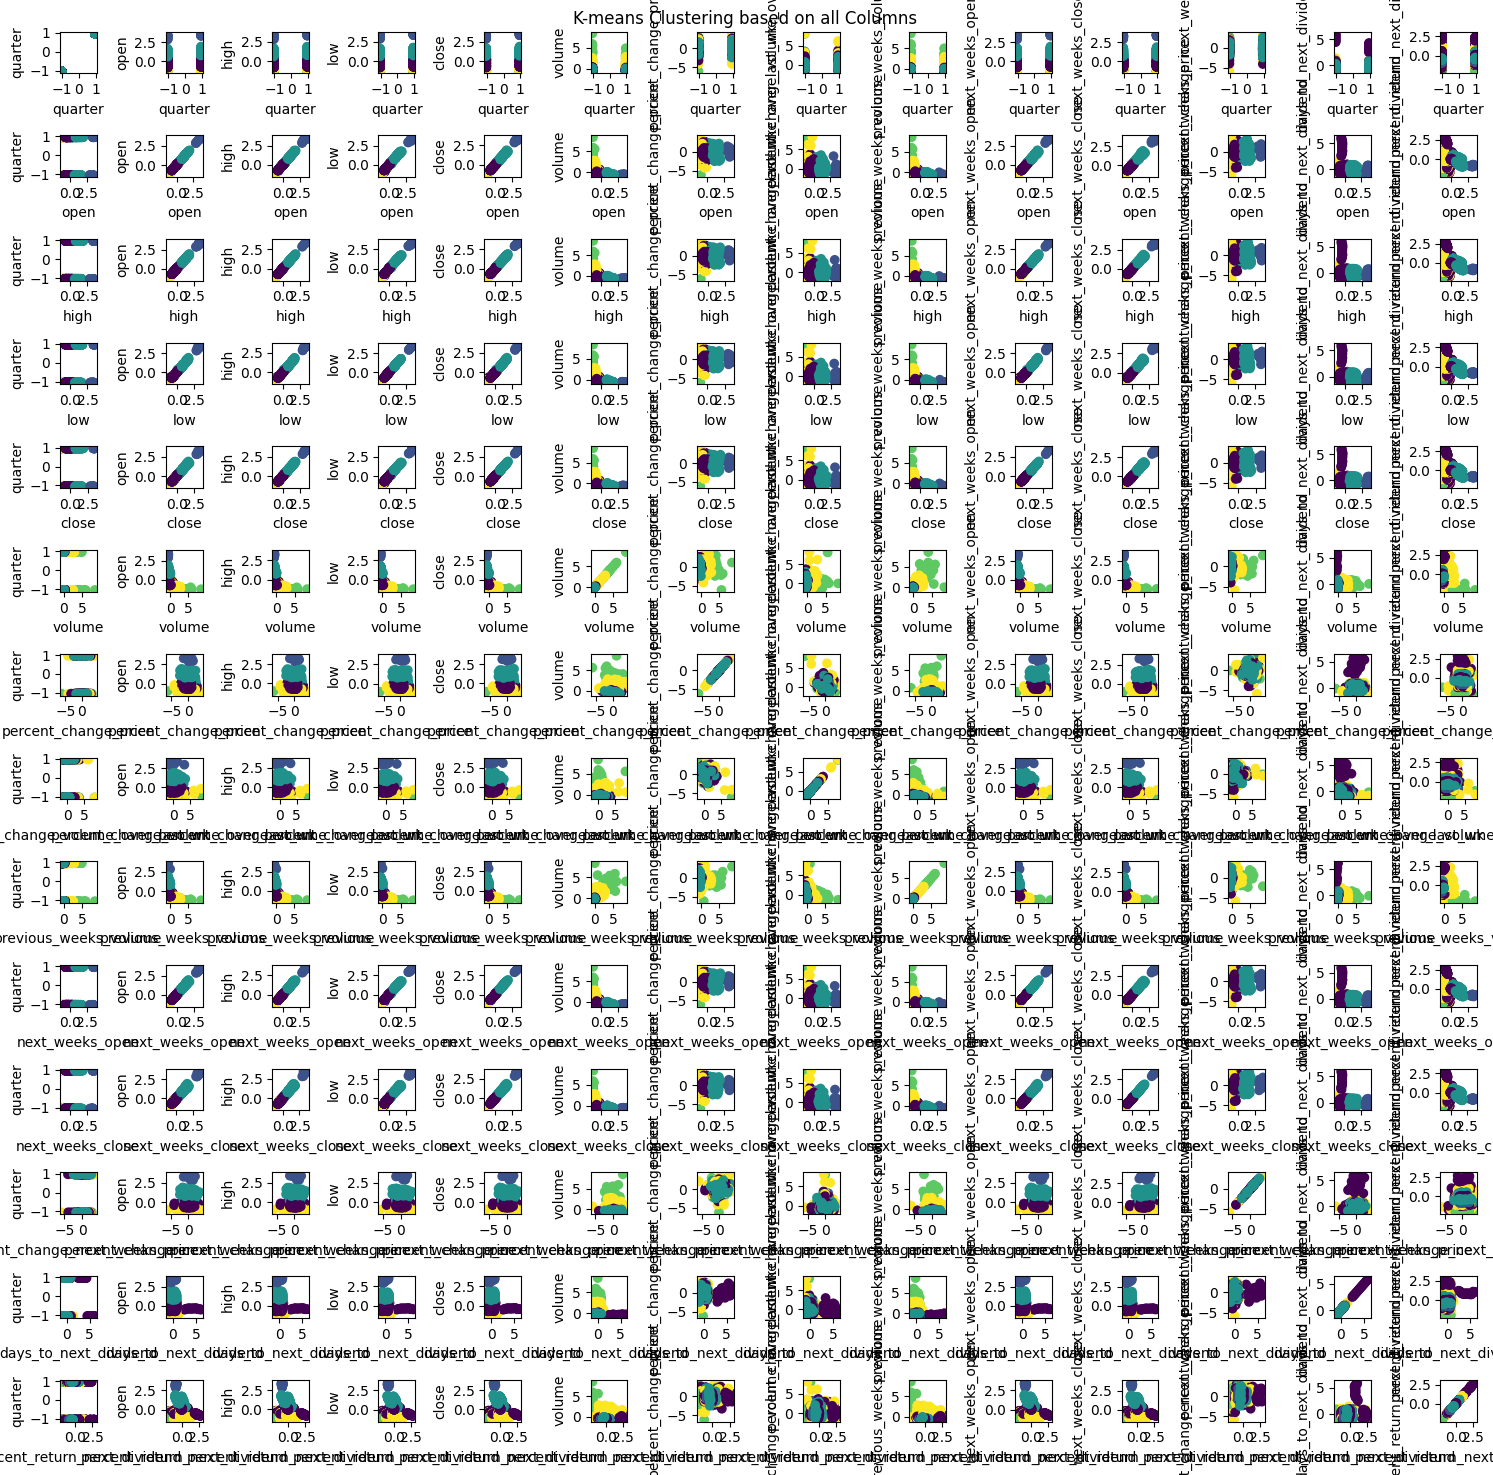

In [ ]:
# Plot the K-means clusters based on all columns
num_columns = scaled_data.shape[1]
fig, axs = plt.subplots(num_columns, num_columns, figsize=(15, 15))

for i in range(num_columns):
    for j in range(num_columns):
        axs[i, j].scatter(scaled_data[:, i], scaled_data[:, j], c=kmeans_labels)
        axs[i, j].set_xlabel(data.columns[i])
        axs[i, j].set_ylabel(data.columns[j])

plt.suptitle("K-means Clustering based on all Columns")
plt.tight_layout()
plt.show()



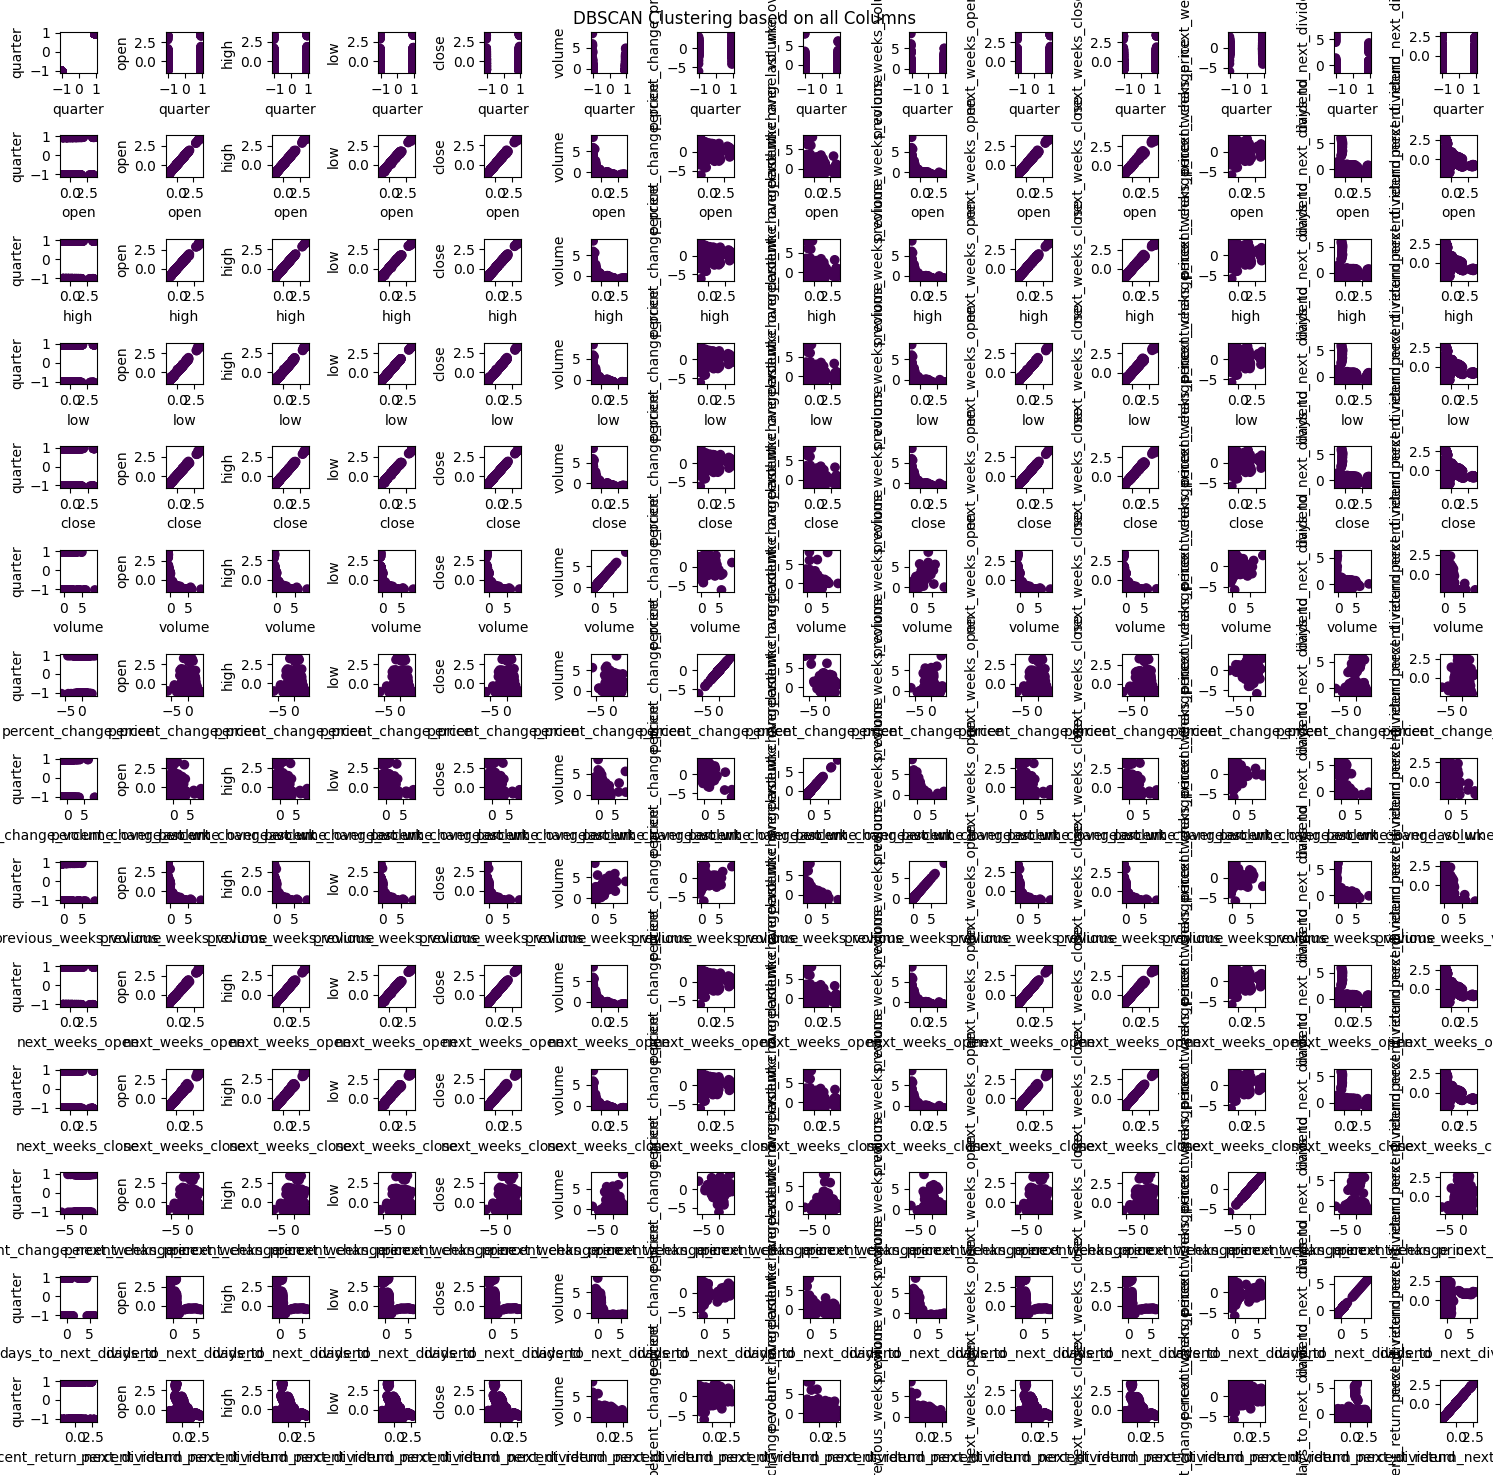

In [ ]:
# Plot the DBSCAN clusters based on all columns
fig, axs = plt.subplots(num_columns, num_columns, figsize=(15, 15))

for i in range(num_columns):
    for j in range(num_columns):
        axs[i, j].scatter(scaled_data[:, i], scaled_data[:, j], c=dbscan_labels)
        axs[i, j].set_xlabel(data.columns[i])
        axs[i, j].set_ylabel(data.columns[j])

plt.suptitle("DBSCAN Clustering based on all Columns")
plt.tight_layout()
plt.show()
